In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import Sequential,utils,Model
from keras.callbacks import EarlyStopping,LearningRateScheduler,ReduceLROnPlateau
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,GlobalAveragePooling2D,Flatten,Dropout,BatchNormalization,RandomFlip,RandomRotation,RandomZoom
from keras.applications import ResNet50,ResNet152V2




warnings.filterwarnings('ignore')            


In [4]:
train_data=utils.image_dataset_from_directory(
    directory='Datasets/PetImages',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
    verbose=1,
    seed=42,
    shuffle=True,
    validation_split=0.2,
    subset='training'
)

validation=utils.image_dataset_from_directory(
    directory='Datasets/PetImages',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
    verbose=1,
    seed=42,
    shuffle=True,
    validation_split=0.2,
    subset='validation'
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [5]:
train_data=train_data.apply(tf.data.experimental.ignore_errors())
validation=validation.apply(tf.data.experimental.ignore_errors())

normalization_layer=tf.keras.layers.Rescaling(1./255)

Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


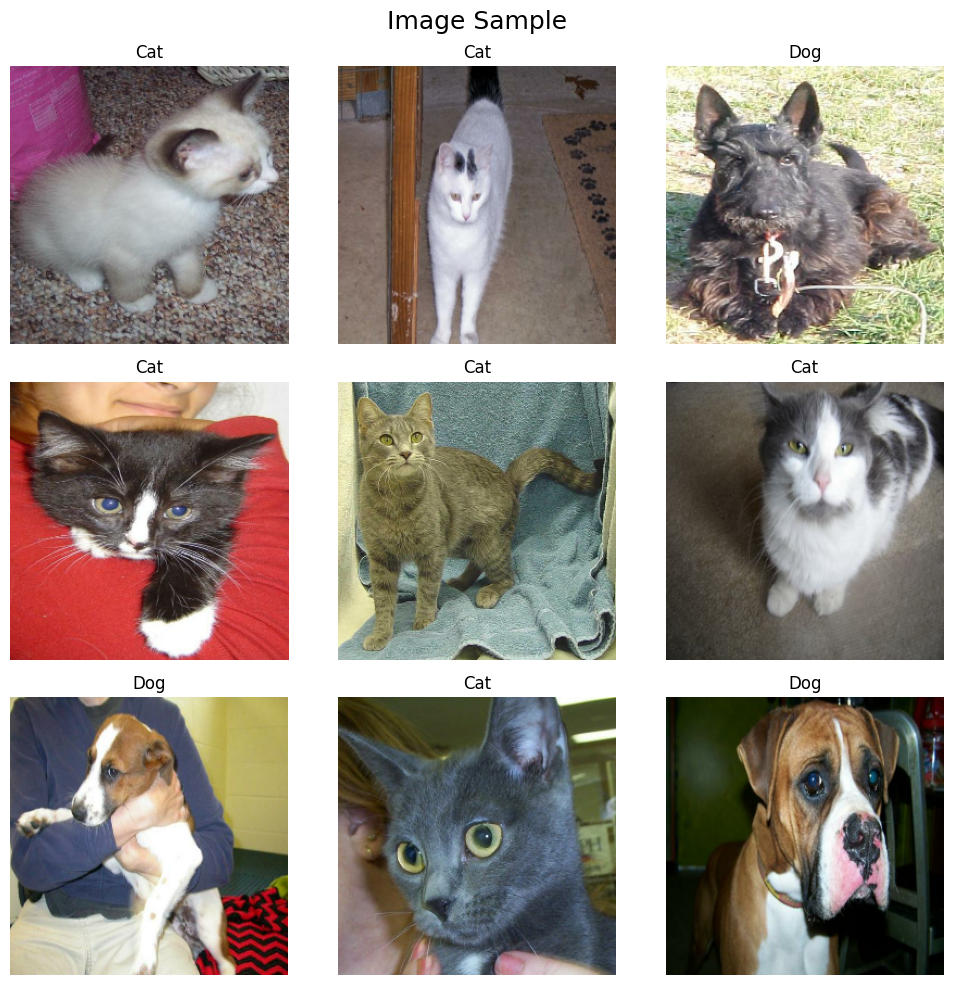

In [6]:
images,label=next(iter(train_data))

plt.figure(figsize=(10,10))
plt.suptitle('Image Sample',fontsize=18,fontweight=12)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(f"{'Dog' if label[i]==1 else 'Cat'}")
    plt.axis('off')

plt.tight_layout()
plt.show()


**************************************Custom CNN Architecture**************************************

In [7]:
early_stop=EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=5,
    mode='auto',
    restore_best_weights=True
)

# def scheduler(epoch,lr):
#     if epoch<=10:return lr
#     if epoch>10:return lr*1.5

# lr_scheduler=LearningRateScheduler(scheduler,verbose=1)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)


data_augmentation=Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)
])


In [6]:
model=Sequential([
    data_augmentation,
    normalization_layer,
    Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(512,kernel_size=(3,3),padding='same',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(1024,kernel_size=(3,3),padding='same',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='same'),

    # Conv2D(2048,kernel_size=(3,3),padding='same',activation='relu'),
    # BatchNormalization(),
    # MaxPooling2D(pool_size=(2,2),strides=2,padding='same'),



    # Flatten(),
    GlobalAveragePooling2D(),

    Dense(128,activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(64,activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    # Dense(32,activation='relu'),
    # BatchNormalization(),
    # Dropout(0.5),
    
    Dense(1,activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adamW',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history=model.fit(train_data,epochs=20,validation_data=validation,callbacks=[early_stop,reduce_lr])

Epoch 1/20


I0000 00:00:1761861375.571286      66 cuda_dnn.cc:529] Loaded cuDNN version 90300


     28/Unknown 19s 112ms/step - accuracy: 0.5427 - loss: 0.8762

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


    212/Unknown 40s 112ms/step - accuracy: 0.5562 - loss: 0.8053

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


    318/Unknown 51s 112ms/step - accuracy: 0.5640 - loss: 0.7848

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


    384/Unknown 59s 112ms/step - accuracy: 0.5684 - loss: 0.7747

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


    439/Unknown 65s 112ms/step - accuracy: 0.5717 - loss: 0.7675

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


    472/Unknown 69s 112ms/step - accuracy: 0.5735 - loss: 0.7635

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


    516/Unknown 74s 112ms/step - accuracy: 0.5760 - loss: 0.7585

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


    540/Unknown 76s 112ms/step - accuracy: 0.5773 - loss: 0.7560

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


    569/Unknown 79s 112ms/step - accuracy: 0.5789 - loss: 0.7530

    618/Unknown 85s 112ms/step - accuracy: 0.5815 - loss: 0.7482

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 93s 125ms/step - accuracy: 0.5815 - loss: 0.7481 - val_accuracy: 0.6827 - val_loss: 0.5862 - learning_rate: 0.0010
Epoch 2/20
 17/618 ━━━━━━━━━━━━━━━━━━━━ 1:07 112ms/step - accuracy: 0.6357 - loss: 0.6272

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


176/618 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - accuracy: 0.6488 - loss: 0.6208

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


322/618 ━━━━━━━━━━━━━━━━━━━━ 33s 112ms/step - accuracy: 0.6593 - loss: 0.6121

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


391/618 ━━━━━━━━━━━━━━━━━━━━ 25s 112ms/step - accuracy: 0.6632 - loss: 0.6087

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


449/618 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.6661 - loss: 0.6062

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


457/618 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.6665 - loss: 0.6059

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


518/618 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.6690 - loss: 0.6036

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


532/618 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.6695 - loss: 0.6031

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


540/618 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.6698 - loss: 0.6029

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


568/618 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.6708 - loss: 0.6019

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6724 - loss: 0.6004

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 118ms/step - accuracy: 0.6725 - loss: 0.6003 - val_accuracy: 0.6852 - val_loss: 0.6085 - learning_rate: 0.0010
Epoch 3/20
 24/618 ━━━━━━━━━━━━━━━━━━━━ 1:06 112ms/step - accuracy: 0.7485 - loss: 0.5159

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


174/618 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - accuracy: 0.7224 - loss: 0.5440

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


327/618 ━━━━━━━━━━━━━━━━━━━━ 32s 112ms/step - accuracy: 0.7274 - loss: 0.5395

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


394/618 ━━━━━━━━━━━━━━━━━━━━ 25s 112ms/step - accuracy: 0.7292 - loss: 0.5375

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


441/618 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - accuracy: 0.7305 - loss: 0.5361

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


458/618 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.7310 - loss: 0.5355

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


518/618 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.7327 - loss: 0.5334

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


521/618 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.7328 - loss: 0.5333

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


540/618 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.7334 - loss: 0.5326

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


563/618 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.7340 - loss: 0.5318

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7356 - loss: 0.5298

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 118ms/step - accuracy: 0.7356 - loss: 0.5297 - val_accuracy: 0.7747 - val_loss: 0.4881 - learning_rate: 0.0010
Epoch 4/20
  6/618 ━━━━━━━━━━━━━━━━━━━━ 1:08 112ms/step - accuracy: 0.8222 - loss: 0.4116

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


194/618 ━━━━━━━━━━━━━━━━━━━━ 47s 112ms/step - accuracy: 0.7865 - loss: 0.4546

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


328/618 ━━━━━━━━━━━━━━━━━━━━ 32s 112ms/step - accuracy: 0.7915 - loss: 0.4452

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


382/618 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.7932 - loss: 0.4421

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


449/618 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.7952 - loss: 0.4385

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


459/618 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.7955 - loss: 0.4380

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


526/618 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.7974 - loss: 0.4346

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


559/618 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.7983 - loss: 0.4330

561/618 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.7984 - loss: 0.4329

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


581/618 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.7989 - loss: 0.4319

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7999 - loss: 0.4303

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 118ms/step - accuracy: 0.7999 - loss: 0.4303 - val_accuracy: 0.7012 - val_loss: 0.6553 - learning_rate: 0.0010
Epoch 5/20
 12/618 ━━━━━━━━━━━━━━━━━━━━ 1:08 113ms/step - accuracy: 0.8640 - loss: 0.3463

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


176/618 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - accuracy: 0.8532 - loss: 0.3413

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


331/618 ━━━━━━━━━━━━━━━━━━━━ 32s 112ms/step - accuracy: 0.8552 - loss: 0.3364

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


399/618 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - accuracy: 0.8562 - loss: 0.3341

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


445/618 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - accuracy: 0.8568 - loss: 0.3328

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


458/618 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.8570 - loss: 0.3324

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


519/618 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.8577 - loss: 0.3307

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


521/618 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.8578 - loss: 0.3307

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


540/618 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.8580 - loss: 0.3302

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


561/618 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.8582 - loss: 0.3296

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8589 - loss: 0.3281

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 118ms/step - accuracy: 0.8589 - loss: 0.3281 - val_accuracy: 0.8377 - val_loss: 0.3519 - learning_rate: 0.0010
Epoch 6/20
 14/618 ━━━━━━━━━━━━━━━━━━━━ 1:07 112ms/step - accuracy: 0.8818 - loss: 0.2516

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


185/618 ━━━━━━━━━━━━━━━━━━━━ 48s 112ms/step - accuracy: 0.8826 - loss: 0.2699

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


321/618 ━━━━━━━━━━━━━━━━━━━━ 33s 112ms/step - accuracy: 0.8829 - loss: 0.2705

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


384/618 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.8835 - loss: 0.2696

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


437/618 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - accuracy: 0.8839 - loss: 0.2690

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


466/618 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.8841 - loss: 0.2688

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


515/618 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.8844 - loss: 0.2684

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


520/618 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.8844 - loss: 0.2684

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


560/618 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.8847 - loss: 0.2680

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


580/618 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.8848 - loss: 0.2678

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8851 - loss: 0.2673

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 118ms/step - accuracy: 0.8851 - loss: 0.2673 - val_accuracy: 0.8861 - val_loss: 0.2676 - learning_rate: 0.0010
Epoch 7/20
  1/618 ━━━━━━━━━━━━━━━━━━━━ 1:27 142ms/step - accuracy: 0.9062 - loss: 0.2562

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


185/618 ━━━━━━━━━━━━━━━━━━━━ 48s 112ms/step - accuracy: 0.8961 - loss: 0.2431

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


321/618 ━━━━━━━━━━━━━━━━━━━━ 33s 112ms/step - accuracy: 0.8972 - loss: 0.2407

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


386/618 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.8982 - loss: 0.2393

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


440/618 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - accuracy: 0.8987 - loss: 0.2386

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


447/618 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - accuracy: 0.8988 - loss: 0.2385

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


521/618 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.8993 - loss: 0.2375

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


525/618 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.8994 - loss: 0.2374

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


541/618 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.8995 - loss: 0.2372

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


563/618 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.8996 - loss: 0.2369

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9000 - loss: 0.2361

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 118ms/step - accuracy: 0.9000 - loss: 0.2360 - val_accuracy: 0.9169 - val_loss: 0.1997 - learning_rate: 0.0010
Epoch 8/20
  8/618 ━━━━━━━━━━━━━━━━━━━━ 1:08 113ms/step - accuracy: 0.9363 - loss: 0.1914

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


175/618 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - accuracy: 0.9183 - loss: 0.2008

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


319/618 ━━━━━━━━━━━━━━━━━━━━ 33s 112ms/step - accuracy: 0.9166 - loss: 0.2047

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


379/618 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.9165 - loss: 0.2050

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


439/618 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - accuracy: 0.9164 - loss: 0.2051

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


454/618 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9163 - loss: 0.2052

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


523/618 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9162 - loss: 0.2053

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


531/618 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.9162 - loss: 0.2053

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


556/618 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9162 - loss: 0.2053

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


567/618 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.9162 - loss: 0.2053

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9162 - loss: 0.2051

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 118ms/step - accuracy: 0.9162 - loss: 0.2051 - val_accuracy: 0.9190 - val_loss: 0.1916 - learning_rate: 0.0010
Epoch 9/20
 13/618 ━━━━━━━━━━━━━━━━━━━━ 1:08 113ms/step - accuracy: 0.9268 - loss: 0.2034

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


184/618 ━━━━━━━━━━━━━━━━━━━━ 48s 113ms/step - accuracy: 0.9222 - loss: 0.1961

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


322/618 ━━━━━━━━━━━━━━━━━━━━ 33s 112ms/step - accuracy: 0.9213 - loss: 0.1968

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


381/618 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.9210 - loss: 0.1973

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


444/618 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - accuracy: 0.9207 - loss: 0.1976

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


457/618 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9207 - loss: 0.1977

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


517/618 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.9207 - loss: 0.1976

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


524/618 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.9207 - loss: 0.1975

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


555/618 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9208 - loss: 0.1974

557/618 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9208 - loss: 0.1974

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9209 - loss: 0.1969

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 118ms/step - accuracy: 0.9209 - loss: 0.1969 - val_accuracy: 0.9263 - val_loss: 0.1853 - learning_rate: 0.0010
Epoch 10/20
  6/618 ━━━━━━━━━━━━━━━━━━━━ 1:08 112ms/step - accuracy: 0.9013 - loss: 0.2311

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


178/618 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - accuracy: 0.9246 - loss: 0.1866

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


320/618 ━━━━━━━━━━━━━━━━━━━━ 33s 112ms/step - accuracy: 0.9253 - loss: 0.1852

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


392/618 ━━━━━━━━━━━━━━━━━━━━ 25s 112ms/step - accuracy: 0.9256 - loss: 0.1844

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


445/618 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - accuracy: 0.9258 - loss: 0.1840

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


447/618 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - accuracy: 0.9258 - loss: 0.1839

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


515/618 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9259 - loss: 0.1835

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


519/618 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9259 - loss: 0.1835

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


542/618 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.9260 - loss: 0.1834

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


557/618 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9260 - loss: 0.1833

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9260 - loss: 0.1831

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 118ms/step - accuracy: 0.9260 - loss: 0.1831 - val_accuracy: 0.9234 - val_loss: 0.1878 - learning_rate: 0.0010
Epoch 11/20
  3/618 ━━━━━━━━━━━━━━━━━━━━ 1:09 112ms/step - accuracy: 0.9601 - loss: 0.1049

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


175/618 ━━━━━━━━━━━━━━━━━━━━ 49s 113ms/step - accuracy: 0.9294 - loss: 0.1611

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


339/618 ━━━━━━━━━━━━━━━━━━━━ 31s 112ms/step - accuracy: 0.9295 - loss: 0.1672

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


378/618 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.9298 - loss: 0.1675

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


444/618 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - accuracy: 0.9301 - loss: 0.1681

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


452/618 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9302 - loss: 0.1682

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


523/618 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9304 - loss: 0.1686

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


527/618 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9304 - loss: 0.1686

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


538/618 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.9305 - loss: 0.1686

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


560/618 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9306 - loss: 0.1686

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9308 - loss: 0.1685

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 118ms/step - accuracy: 0.9308 - loss: 0.1685 - val_accuracy: 0.9421 - val_loss: 0.1535 - learning_rate: 0.0010
Epoch 12/20
  2/618 ━━━━━━━━━━━━━━━━━━━━ 1:09 113ms/step - accuracy: 0.9766 - loss: 0.0882

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


177/618 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - accuracy: 0.9450 - loss: 0.1414

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


328/618 ━━━━━━━━━━━━━━━━━━━━ 32s 112ms/step - accuracy: 0.9425 - loss: 0.1461

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


390/618 ━━━━━━━━━━━━━━━━━━━━ 25s 112ms/step - accuracy: 0.9419 - loss: 0.1472

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


448/618 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - accuracy: 0.9415 - loss: 0.1481

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


454/618 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9415 - loss: 0.1482

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


532/618 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.9411 - loss: 0.1492

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


547/618 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.9410 - loss: 0.1493

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


554/618 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.9410 - loss: 0.1494

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


559/618 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9410 - loss: 0.1494

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9409 - loss: 0.1498

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 118ms/step - accuracy: 0.9409 - loss: 0.1498 - val_accuracy: 0.9491 - val_loss: 0.1279 - learning_rate: 0.0010
Epoch 13/20
  5/618 ━━━━━━━━━━━━━━━━━━━━ 1:09 113ms/step - accuracy: 0.9879 - loss: 0.0447

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


177/618 ━━━━━━━━━━━━━━━━━━━━ 49s 113ms/step - accuracy: 0.9452 - loss: 0.1396

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


323/618 ━━━━━━━━━━━━━━━━━━━━ 33s 113ms/step - accuracy: 0.9438 - loss: 0.1433

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


381/618 ━━━━━━━━━━━━━━━━━━━━ 26s 113ms/step - accuracy: 0.9438 - loss: 0.1436

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


440/618 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - accuracy: 0.9438 - loss: 0.1438

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


452/618 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.9438 - loss: 0.1438

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


516/618 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.9438 - loss: 0.1439

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


530/618 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 0.9438 - loss: 0.1439 

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


551/618 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9438 - loss: 0.1438

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


555/618 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9438 - loss: 0.1438

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9438 - loss: 0.1437

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 118ms/step - accuracy: 0.9438 - loss: 0.1437 - val_accuracy: 0.9340 - val_loss: 0.1626 - learning_rate: 0.0010
Epoch 14/20
  1/618 ━━━━━━━━━━━━━━━━━━━━ 1:26 140ms/step - accuracy: 0.8750 - loss: 0.4213

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


184/618 ━━━━━━━━━━━━━━━━━━━━ 48s 112ms/step - accuracy: 0.9430 - loss: 0.1474

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


328/618 ━━━━━━━━━━━━━━━━━━━━ 32s 112ms/step - accuracy: 0.9433 - loss: 0.1456

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


384/618 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.9436 - loss: 0.1445

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


443/618 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - accuracy: 0.9437 - loss: 0.1440

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


458/618 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.9437 - loss: 0.1439

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


517/618 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9438 - loss: 0.1435

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


538/618 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.9438 - loss: 0.1434

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


557/618 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9438 - loss: 0.1433

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9440 - loss: 0.1428

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 118ms/step - accuracy: 0.9440 - loss: 0.1428 - val_accuracy: 0.9469 - val_loss: 0.1327 - learning_rate: 0.0010
Epoch 15/20
  2/618 ━━━━━━━━━━━━━━━━━━━━ 1:09 112ms/step - accuracy: 0.9453 - loss: 0.1240

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


177/618 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - accuracy: 0.9476 - loss: 0.1296

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


336/618 ━━━━━━━━━━━━━━━━━━━━ 31s 112ms/step - accuracy: 0.9465 - loss: 0.1312

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


391/618 ━━━━━━━━━━━━━━━━━━━━ 25s 113ms/step - accuracy: 0.9462 - loss: 0.1320

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


448/618 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - accuracy: 0.9459 - loss: 0.1328

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


452/618 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.9459 - loss: 0.1329

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


516/618 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.9457 - loss: 0.1334

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


522/618 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.9457 - loss: 0.1334

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


542/618 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.9457 - loss: 0.1334

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


558/618 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9457 - loss: 0.1335

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9458 - loss: 0.1334

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 119ms/step - accuracy: 0.9458 - loss: 0.1334 - val_accuracy: 0.9494 - val_loss: 0.1224 - learning_rate: 0.0010
Epoch 16/20
  1/618 ━━━━━━━━━━━━━━━━━━━━ 1:25 139ms/step - accuracy: 0.9062 - loss: 0.1565

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


194/618 ━━━━━━━━━━━━━━━━━━━━ 47s 113ms/step - accuracy: 0.9548 - loss: 0.1152

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


321/618 ━━━━━━━━━━━━━━━━━━━━ 33s 113ms/step - accuracy: 0.9535 - loss: 0.1176

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


379/618 ━━━━━━━━━━━━━━━━━━━━ 26s 113ms/step - accuracy: 0.9533 - loss: 0.1186

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


442/618 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - accuracy: 0.9530 - loss: 0.1194

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


448/618 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - accuracy: 0.9530 - loss: 0.1194

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


518/618 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.9529 - loss: 0.1198

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


520/618 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.9528 - loss: 0.1199

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


546/618 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.9528 - loss: 0.1200

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


562/618 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9528 - loss: 0.1200

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9528 - loss: 0.1202

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 119ms/step - accuracy: 0.9528 - loss: 0.1202 - val_accuracy: 0.9427 - val_loss: 0.1482 - learning_rate: 0.0010
Epoch 17/20
  1/618 ━━━━━━━━━━━━━━━━━━━━ 1:28 143ms/step - accuracy: 0.9688 - loss: 0.0497

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


174/618 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - accuracy: 0.9482 - loss: 0.1334

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


319/618 ━━━━━━━━━━━━━━━━━━━━ 33s 113ms/step - accuracy: 0.9493 - loss: 0.1302

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


385/618 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.9497 - loss: 0.1291

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


448/618 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - accuracy: 0.9499 - loss: 0.1284

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


456/618 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.9499 - loss: 0.1283

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


531/618 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 0.9502 - loss: 0.1276

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


538/618 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 0.9502 - loss: 0.1276

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


545/618 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.9503 - loss: 0.1275

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


563/618 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9503 - loss: 0.1273

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9505 - loss: 0.1268

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 119ms/step - accuracy: 0.9505 - loss: 0.1268 - val_accuracy: 0.9550 - val_loss: 0.1139 - learning_rate: 0.0010
Epoch 18/20
  8/618 ━━━━━━━━━━━━━━━━━━━━ 1:08 113ms/step - accuracy: 0.9541 - loss: 0.1126

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


175/618 ━━━━━━━━━━━━━━━━━━━━ 49s 113ms/step - accuracy: 0.9441 - loss: 0.1330

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


323/618 ━━━━━━━━━━━━━━━━━━━━ 33s 113ms/step - accuracy: 0.9474 - loss: 0.1282

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


396/618 ━━━━━━━━━━━━━━━━━━━━ 25s 113ms/step - accuracy: 0.9483 - loss: 0.1270

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


443/618 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - accuracy: 0.9486 - loss: 0.1264

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


484/618 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.9490 - loss: 0.1258

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


519/618 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.9493 - loss: 0.1252

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


521/618 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.9493 - loss: 0.1252

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


543/618 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.9495 - loss: 0.1248

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


555/618 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9496 - loss: 0.1246

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9501 - loss: 0.1237

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 118ms/step - accuracy: 0.9501 - loss: 0.1237 - val_accuracy: 0.9575 - val_loss: 0.1091 - learning_rate: 0.0010
Epoch 19/20
  2/618 ━━━━━━━━━━━━━━━━━━━━ 1:11 116ms/step - accuracy: 0.9297 - loss: 0.1434

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


174/618 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - accuracy: 0.9603 - loss: 0.1043

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


336/618 ━━━━━━━━━━━━━━━━━━━━ 31s 112ms/step - accuracy: 0.9599 - loss: 0.1052

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


378/618 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.9599 - loss: 0.1052

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


437/618 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - accuracy: 0.9598 - loss: 0.1055

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


455/618 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9597 - loss: 0.1056

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


526/618 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9595 - loss: 0.1061

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


538/618 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.9595 - loss: 0.1062

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


569/618 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.9594 - loss: 0.1063

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9593 - loss: 0.1065

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 118ms/step - accuracy: 0.9593 - loss: 0.1065 - val_accuracy: 0.9599 - val_loss: 0.0995 - learning_rate: 0.0010
Epoch 20/20
  1/618 ━━━━━━━━━━━━━━━━━━━━ 1:26 140ms/step - accuracy: 0.9688 - loss: 0.0810

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


174/618 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - accuracy: 0.9631 - loss: 0.0956

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


328/618 ━━━━━━━━━━━━━━━━━━━━ 32s 112ms/step - accuracy: 0.9611 - loss: 0.1001

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


378/618 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.9608 - loss: 0.1008

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


443/618 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - accuracy: 0.9604 - loss: 0.1015

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


479/618 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9603 - loss: 0.1018

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


518/618 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9602 - loss: 0.1020

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


521/618 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9602 - loss: 0.1021

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


544/618 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.9601 - loss: 0.1022

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


561/618 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9601 - loss: 0.1022

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9600 - loss: 0.1023

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 73s 118ms/step - accuracy: 0.9600 - loss: 0.1023 - val_accuracy: 0.9633 - val_loss: 0.0927 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 20.


In [10]:
train_accuracy=model.evaluate(train_data)[1]
val_accuracy=model.evaluate(validation)[1]

      8/Unknown 0s 25ms/step - accuracy: 0.9866 - loss: 0.0666

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


    185/Unknown 4s 24ms/step - accuracy: 0.9749 - loss: 0.0702

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


    322/Unknown 8s 24ms/step - accuracy: 0.9737 - loss: 0.0710

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


    384/Unknown 9s 24ms/step - accuracy: 0.9735 - loss: 0.0708

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


    456/Unknown 11s 24ms/step - accuracy: 0.9736 - loss: 0.0705

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


    470/Unknown 11s 24ms/step - accuracy: 0.9736 - loss: 0.0704

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


    523/Unknown 13s 24ms/step - accuracy: 0.9737 - loss: 0.0701

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


    544/Unknown 13s 24ms/step - accuracy: 0.9737 - loss: 0.0699

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


    562/Unknown 13s 24ms/step - accuracy: 0.9738 - loss: 0.0698

618/618 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9739 - loss: 0.0694
     72/Unknown 2s 24ms/step - accuracy: 0.9752 - loss: 0.0802

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


    145/Unknown 4s 24ms/step - accuracy: 0.9701 - loss: 0.0853

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9696 - loss: 0.0858


In [11]:
print(f'Training Accuracy: {train_accuracy:.2%}')
print(f'Validation Accuracy: {val_accuracy:.2%}')

Training Accuracy: 97.56%
Validation Accuracy: 96.35%


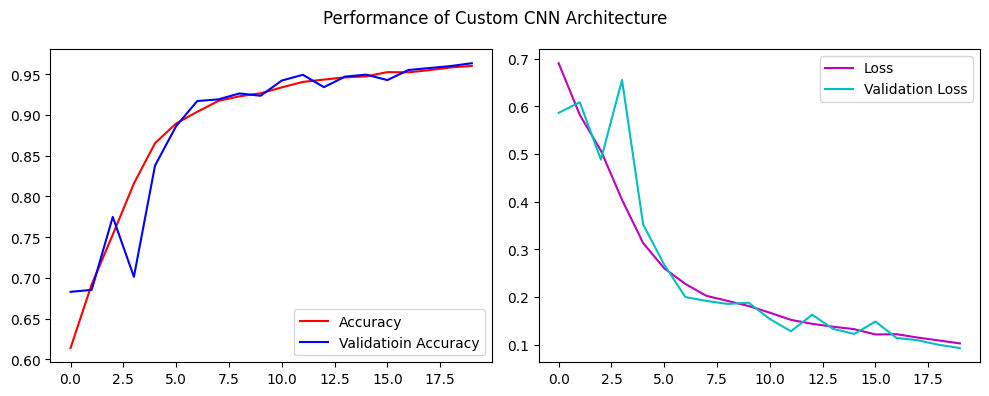

In [12]:
fig,axes=plt.subplots(1,2,figsize=(10,4))

axes[0].plot(history.history['accuracy'],animated=True,color='r',label='Accuracy')
axes[0].plot(history.history['val_accuracy'],animated=True,color='b',label='Validatioin Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'],animated=True,color='m',label='Loss')
axes[1].plot(history.history['val_loss'],animated=True,color='c',label='Validation Loss')
axes[1].legend()

fig.suptitle('Performance of Custom CNN Architecture',fontsize=12,fontweight=15)
fig.tight_layout()

****Fine Tuning ResNet50****

In [ ]:
base_model=ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(256,256,3)
)

for layer in base_model.layers:
    layer.trainable=False


x=base_model.output
x=GlobalAveragePooling2D()(x)

x=Dense(128,activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.4)(x)

x=Dense(64,activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)

y=Dense(1,activation='sigmoid')(x)

model_res=Model(inputs=base_model.input,outputs=y)
model_res.compile(optimizer='adamW',loss='binary_crossentropy',metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [14]:
model_res.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,859,073 (91.02 MB)

 Trainable params: 270,977 (1.03 MB)

 Non-trainable params: 23,588,096 (89.98 MB)

In [15]:
history_res=model_res.fit(train_data,epochs=20,validation_data=validation,callbacks=[early_stop,reduce_lr])

Epoch 1/20


I0000 00:00:1761862890.146658      66 service.cc:148] XLA service 0x79657a61de10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761862890.147429      66 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


      3/Unknown 17s 54ms/step - accuracy: 0.5382 - loss: 0.7953

I0000 00:00:1761862896.018699      66 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


     10/Unknown 18s 54ms/step - accuracy: 0.6874 - loss: 0.5691

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


    194/Unknown 27s 53ms/step - accuracy: 0.9235 - loss: 0.1738

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


    319/Unknown 34s 53ms/step - accuracy: 0.9378 - loss: 0.1465

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


    378/Unknown 37s 53ms/step - accuracy: 0.9417 - loss: 0.1387

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


    442/Unknown 41s 53ms/step - accuracy: 0.9449 - loss: 0.1324

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


    448/Unknown 41s 53ms/step - accuracy: 0.9452 - loss: 0.1319

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


    518/Unknown 45s 53ms/step - accuracy: 0.9479 - loss: 0.1265

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


    524/Unknown 45s 53ms/step - accuracy: 0.9481 - loss: 0.1261

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


    540/Unknown 46s 53ms/step - accuracy: 0.9487 - loss: 0.1250

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


    555/Unknown 47s 53ms/step - accuracy: 0.9491 - loss: 0.1240

    618/Unknown 50s 53ms/step - accuracy: 0.9509 - loss: 0.1204

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 66s 78ms/step - accuracy: 0.9509 - loss: 0.1203 - val_accuracy: 0.9810 - val_loss: 0.0428 - learning_rate: 0.0010
Epoch 2/20
  9/618 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.9672 - loss: 0.1062

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


177/618 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.9775 - loss: 0.0653

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


322/618 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - accuracy: 0.9777 - loss: 0.0628

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


383/618 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.9779 - loss: 0.0621

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


434/618 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.9780 - loss: 0.0617 

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


447/618 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.9780 - loss: 0.0616

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


514/618 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9781 - loss: 0.0611

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


525/618 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9782 - loss: 0.0610

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


542/618 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9782 - loss: 0.0609

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


554/618 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9782 - loss: 0.0609

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9783 - loss: 0.0606

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9783 - loss: 0.0606 - val_accuracy: 0.9820 - val_loss: 0.0437 - learning_rate: 0.0010
Epoch 3/20
  4/618 ━━━━━━━━━━━━━━━━━━━━ 33s 54ms/step - accuracy: 0.9779 - loss: 0.0607

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


196/618 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.9779 - loss: 0.0555

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


334/618 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.9781 - loss: 0.0561

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


385/618 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.9782 - loss: 0.0558

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


443/618 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.9784 - loss: 0.0557

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


449/618 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.9784 - loss: 0.0557

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


520/618 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9786 - loss: 0.0553

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


531/618 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9786 - loss: 0.0553

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


540/618 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9787 - loss: 0.0552

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


559/618 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9787 - loss: 0.0551

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9789 - loss: 0.0550

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9789 - loss: 0.0550 - val_accuracy: 0.9832 - val_loss: 0.0404 - learning_rate: 0.0010
Epoch 4/20
 24/618 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.9889 - loss: 0.0391

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


177/618 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.9805 - loss: 0.0547

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


351/618 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.9799 - loss: 0.0561

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


385/618 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.9800 - loss: 0.0561

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


458/618 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.9800 - loss: 0.0562

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


473/618 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9800 - loss: 0.0562

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


521/618 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9801 - loss: 0.0561

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


544/618 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9801 - loss: 0.0560

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


561/618 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9801 - loss: 0.0560

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9802 - loss: 0.0558

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9802 - loss: 0.0558 - val_accuracy: 0.9852 - val_loss: 0.0412 - learning_rate: 0.0010
Epoch 5/20
 13/618 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.9747 - loss: 0.0586

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


179/618 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.9808 - loss: 0.0536

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


328/618 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - accuracy: 0.9818 - loss: 0.0506

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


386/618 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.9821 - loss: 0.0497

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


449/618 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.9823 - loss: 0.0491

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


520/618 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9826 - loss: 0.0484

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


542/618 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9827 - loss: 0.0482

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


590/618 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9829 - loss: 0.0478

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9829 - loss: 0.0477

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9829 - loss: 0.0477 - val_accuracy: 0.9844 - val_loss: 0.0423 - learning_rate: 0.0010
Epoch 6/20
  3/618 ━━━━━━━━━━━━━━━━━━━━ 33s 55ms/step - accuracy: 0.9497 - loss: 0.0822

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


196/618 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.9842 - loss: 0.0425

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


335/618 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - accuracy: 0.9843 - loss: 0.0420

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


385/618 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.9843 - loss: 0.0417

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


452/618 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.9844 - loss: 0.0416

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


468/618 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.9844 - loss: 0.0416

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


523/618 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9844 - loss: 0.0415

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


538/618 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9844 - loss: 0.0415

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


556/618 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9844 - loss: 0.0414

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


565/618 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9844 - loss: 0.0414

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9845 - loss: 0.0414

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9845 - loss: 0.0414 - val_accuracy: 0.9838 - val_loss: 0.0447 - learning_rate: 0.0010
Epoch 7/20
  4/618 ━━━━━━━━━━━━━━━━━━━━ 33s 55ms/step - accuracy: 0.9935 - loss: 0.0450

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


181/618 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.9863 - loss: 0.0453

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


324/618 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.9868 - loss: 0.0420

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


389/618 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.9871 - loss: 0.0409

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


440/618 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.9872 - loss: 0.0404

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


450/618 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.9872 - loss: 0.0403

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


518/618 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9874 - loss: 0.0395

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


525/618 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9874 - loss: 0.0394

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


543/618 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9875 - loss: 0.0393

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


563/618 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9875 - loss: 0.0391

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9876 - loss: 0.0387

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9876 - loss: 0.0387 - val_accuracy: 0.9838 - val_loss: 0.0462 - learning_rate: 2.0000e-04
Epoch 8/20
 28/618 ━━━━━━━━━━━━━━━━━━━━ 31s 54ms/step - accuracy: 0.9826 - loss: 0.0531

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


181/618 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.9868 - loss: 0.0382

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


324/618 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - accuracy: 0.9875 - loss: 0.0362

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


389/618 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.9878 - loss: 0.0355

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


452/618 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.9879 - loss: 0.0350

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


520/618 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9880 - loss: 0.0346

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


547/618 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9881 - loss: 0.0344

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


578/618 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9881 - loss: 0.0342

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9882 - loss: 0.0340

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


618/618 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9882 - loss: 0.0340 - val_accuracy: 0.9836 - val_loss: 0.0479 - learning_rate: 2.0000e-04
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 3.


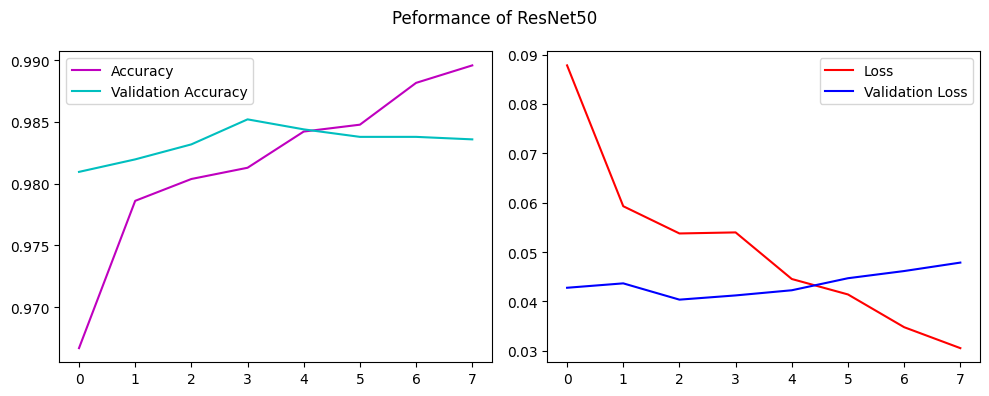

In [16]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Peformance of ResNet50',fontsize=12,fontweight=14)
axes[0].plot(history_res.history['accuracy'],color='m',label='Accuracy')
axes[0].plot(history_res.history['val_accuracy'],color='c',label='Validation Accuracy')
axes[0].legend()

axes[1].plot(history_res.history['loss'],color='r',label='Loss')
axes[1].plot(history_res.history['val_loss'],color='b',label='Validation Loss')
axes[1].legend()

fig.tight_layout()